# Introdaction to neural network classification with Tensorflow

In this notebook we are going to learn how to write neural networks for classification.

A calssification is where you try to classify somthing as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

# Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_sample = 1000

# Creating circles
X,y = make_circles(n_samples=n_sample, noise=0.03, random_state=42)

In [2]:
# Check features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [3]:
# Check label
y[:10]


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
import pandas as pd
df = pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "label": y})
df

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


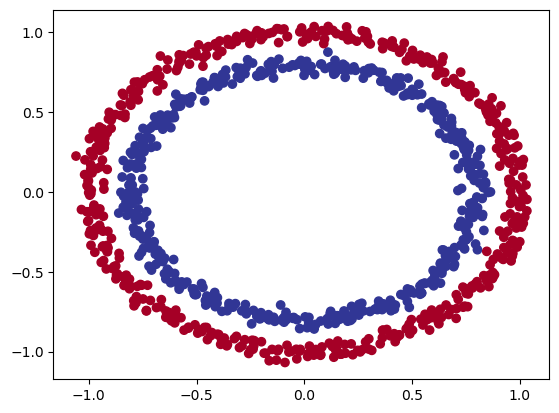

In [5]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

# Steps in modeling
### The steps in modeling with tensorflow are typically:
1. Create or import model
2. Compile model
3. fit the model
4. Evaluate the model
5. Tweak
6. Evaluate..

In [6]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [7]:
tf.config.set_visible_devices([],'GPU')

In [8]:
tf.random.set_seed(42)

model_1 = Sequential()

model_1.add(Dense(1))

model_1.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [9]:
model_1.fit(X,y, epochs=5)

Epoch 1/5


2023-06-01 18:23:39.030722: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


32/32 [==============================] - 0s 525us/step - loss: 4.2570 - accuracy: 0.4130
Epoch 2/5
32/32 [==============================] - 0s 524us/step - loss: 4.2210 - accuracy: 0.4160
Epoch 3/5
32/32 [==============================] - 0s 351us/step - loss: 4.1672 - accuracy: 0.4280
Epoch 4/5
32/32 [==============================] - 0s 338us/step - loss: 4.0368 - accuracy: 0.4360
Epoch 5/5


2023-06-01 18:23:39.376637: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x285c06610 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-06-01 18:23:39.376649: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Host, Default Version
2023-06-01 18:23:39.393199: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-06-01 18:23:39.514675: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 [==============================] - 0s 380us/step - loss: 3.9456 - accuracy: 0.4480


In [10]:
X.shape

(1000, 2)

In [11]:
tf.random.set_seed(42)

model_2 = Sequential()

model_2.add(Dense(2, activation='relu'))
model_2.add(Dense(1, ))

model_2.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

model_2.fit(X,y, epochs=200, verbose=0)
model_2.evaluate(X,y)

32/32 [==============================] - 0s 345us/step - loss: 0.6932 - accuracy: 0.5000


[0.693184494972229, 0.5]

In [12]:
tf.random.set_seed(42)

model_3 = Sequential()

model_3.add(Dense(102, activation='relu'))
model_3.add(Dense(11, activation='relu' ))
model_3.add(Dense(1, activation='sigmoid' ))

model_3.compile(optimizer='adam', 
                loss=tf.keras.losses.BinaryCrossentropy(), 
                metrics=['accuracy'])

model_3.fit(X,y, epochs=200, verbose=0)
model_3.evaluate(X,y)

32/32 [==============================] - 0s 382us/step - loss: 0.0013 - accuracy: 1.0000


[0.00132711639162153, 1.0]

In [13]:
y_pred_3 = model_3.predict(X)
y_pred_3

32/32 [==============================] - 0s 334us/step


array([[9.99987662e-01],
       [9.99984920e-01],
       [9.99886870e-01],
       [9.99974847e-01],
       [2.12583302e-07],
       [9.99793828e-01],
       [9.99984145e-01],
       [9.99987066e-01],
       [9.99936044e-01],
       [6.33047762e-07],
       [9.97736573e-01],
       [7.50344770e-06],
       [9.99766886e-01],
       [9.99982953e-01],
       [9.98098671e-01],
       [9.99983311e-01],
       [3.41589157e-06],
       [9.99981284e-01],
       [9.99962986e-01],
       [1.21244038e-05],
       [9.99991298e-01],
       [1.35751645e-06],
       [2.98112900e-06],
       [9.99987960e-01],
       [1.68782371e-05],
       [2.52418406e-03],
       [5.39722851e-06],
       [9.98654664e-01],
       [9.99755979e-01],
       [9.99959171e-01],
       [4.27983556e-04],
       [8.81235519e-06],
       [9.99989092e-01],
       [8.31458237e-07],
       [2.58039257e-10],
       [9.82817383e-08],
       [9.99970913e-01],
       [9.99634743e-01],
       [9.99978662e-01],
       [1.42897639e-04],


In [14]:
import numpy as np

def plot_Dec_boundry(model, X,y):
    """
    Plot the decision boundy created by a model predicting on X.
    """
    # Define the axis boundies of the plot and create a meshgrid
    x_min, x_max = X[:,0].min() - 0.1, X[:,0].max()+0.1
    y_min, y_max = X[:,1].min() - 0.1, X[:, 1].max() +0.1

    xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),
                         np.linspace(y_min,y_max, 100))

    # Create X value (we are going to make predictns on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] #stack 2D arrays together

    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multicalss calssification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 228us/step
doing binary classification


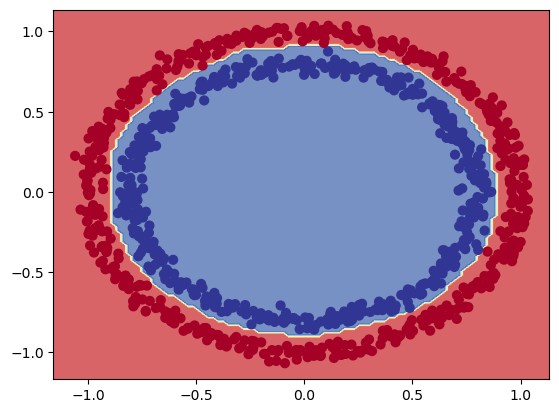

In [15]:
plot_Dec_boundry(model=model_3, X=X, y=y)

# Evaluating and improving our classification

so far we have been training and testing on the same dataset...

However, in machine learning this is basically a sin.

so lets create a training and test set.

In [16]:
len(X)

1000

In [17]:
# split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape,X_test.shape,y_train.shape,y_test.shape,

((800, 2), (200, 2), (800,), (200,))

In [18]:
# Lets recreate a model to fit on the training data and evaluate on the testing data
tf.random.set_seed(42)

model_4 = Sequential()

model_4.add(Dense(4, activation='relu'))
model_4.add(Dense(4, activation='relu'))
model_4.add(Dense(1, activation='sigmoid'))

model_4.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])



history = model_4.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 646us/step - loss: 0.6939 - accuracy: 0.4700
Epoch 2/25
25/25 [==============================] - 0s 575us/step - loss: 0.6910 - accuracy: 0.5075
Epoch 3/25
25/25 [==============================] - 0s 678us/step - loss: 0.6878 - accuracy: 0.5250
Epoch 4/25
25/25 [==============================] - 0s 601us/step - loss: 0.6838 - accuracy: 0.5387
Epoch 5/25
25/25 [==============================] - 0s 516us/step - loss: 0.6781 - accuracy: 0.5487
Epoch 6/25
25/25 [==============================] - 0s 569us/step - loss: 0.6709 - accuracy: 0.5512
Epoch 7/25
25/25 [==============================] - 0s 727us/step - loss: 0.6619 - accuracy: 0.5750
Epoch 8/25
25/25 [==============================] - 0s 576us/step - loss: 0.6473 - accuracy: 0.6025
Epoch 9/25
25/25 [==============================] - 0s 829us/step - loss: 0.6237 - accuracy: 0.6712
Epoch 10/25
25/25 [==============================] - 0s 584us/step - loss: 0.5891 - accuracy: 0.7337

In [19]:
model_4.evaluate(X_test, y_test)

7/7 [==============================] - 0s 567us/step - loss: 0.0951 - accuracy: 0.9900


[0.09505749493837357, 0.9900000095367432]

313/313 [==============================] - 0s 290us/step
doing binary classification
313/313 [==============================] - 0s 225us/step
doing binary classification


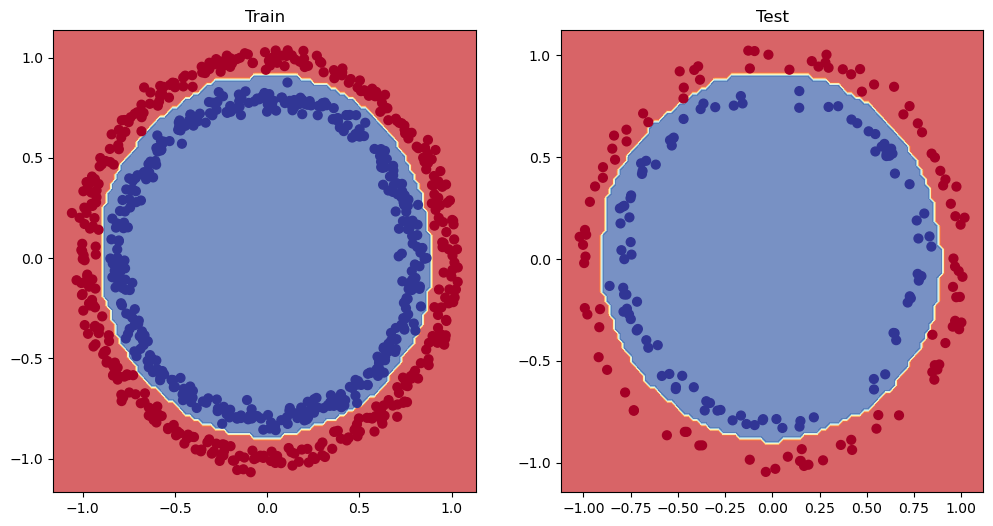

In [20]:
# plot the decision boundry
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_Dec_boundry(model=model_3, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_Dec_boundry(model=model_3, X=X_test, y=y_test)
plt.show();

Text(0.5, 1.0, 'Model 4 loss curves')

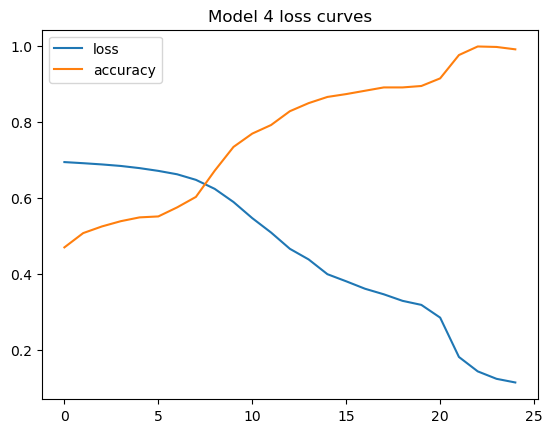

In [21]:
pd.DataFrame(history.history).plot()
plt.title('Model 4 loss curves')

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we are going to use the following steps:
* A lerning arte **callback** - you can think of call back as an extra piece of functionality, you can add to your *while* its training. 
* Another model (we could use the same one as above, but we are practicing building model here)
* A modified loss curves plot.

In [22]:
tf.random.set_seed(42)

model_5 = Sequential()

model_5.add(Dense(2, activation='relu'))
model_5.add(Dense(4, activation='relu'))
model_5.add(Dense(4, activation='relu'))
model_5.add(Dense(1, activation='sigmoid'))

model_5.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 100**(epoch/20))


history2 = model_5.fit(X_train, y_train, callbacks=[lr_schedule], epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.7926 - accuracy: 0.4950 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 706us/step - loss: 0.7889 - accuracy: 0.4950 - lr: 1.2589e-04
Epoch 3/100
25/25 [==============================] - 0s 638us/step - loss: 0.7846 - accuracy: 0.4950 - lr: 1.5849e-04
Epoch 4/100
25/25 [==============================] - 0s 605us/step - loss: 0.7793 - accuracy: 0.4975 - lr: 1.9953e-04
Epoch 5/100
25/25 [==============================] - 0s 564us/step - loss: 0.7736 - accuracy: 0.4963 - lr: 2.5119e-04
Epoch 6/100
25/25 [==============================] - 0s 563us/step - loss: 0.7670 - accuracy: 0.4888 - lr: 3.1623e-04
Epoch 7/100
25/25 [==============================] - 0s 556us/step - loss: 0.7595 - accuracy: 0.4925 - lr: 3.9811e-04
Epoch 8/100
25/25 [==============================] - 0s 560us/step - loss: 0.7517 - accuracy: 0.4925 - lr: 5.0119e-04
Epoch 9/100
25/25 [==============================] - 0s 55

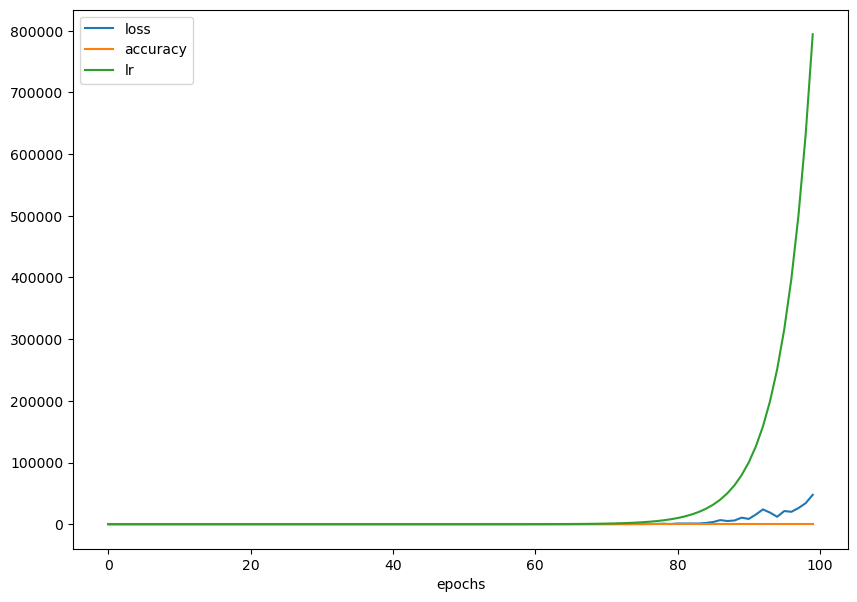

In [23]:
pd.DataFrame(history2.history).plot(figsize=(10,7), xlabel="epochs");

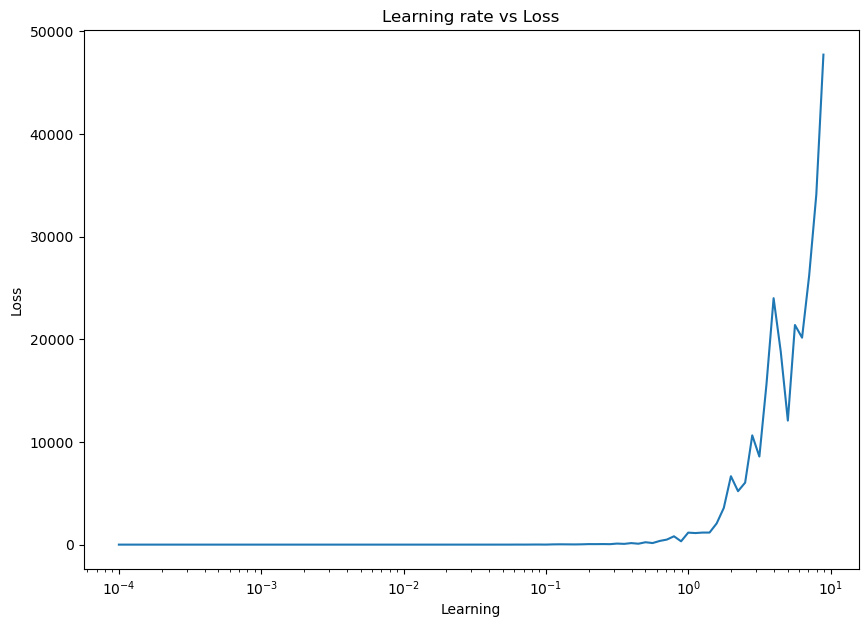

In [24]:
lrs  =1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history2.history['loss'])
plt.xlabel('Learning')
plt.ylabel('Loss')
plt.title('Learning rate vs Loss');

In [25]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [26]:
tf.random.set_seed(42)

model_6 = Sequential()


model_6.add(Dense(4, activation='relu'))
model_6.add(Dense(4, activation='relu'))
model_6.add(Dense(1, activation='sigmoid'))

model_6.compile(loss='binary_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
                metrics=['accuracy'])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 100**(epoch/20))


history3 = model_6.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 642us/step - loss: 0.6838 - accuracy: 0.5800
Epoch 2/25
25/25 [==============================] - 0s 519us/step - loss: 0.6714 - accuracy: 0.6162
Epoch 3/25
25/25 [==============================] - 0s 527us/step - loss: 0.6336 - accuracy: 0.6413
Epoch 4/25
25/25 [==============================] - 0s 587us/step - loss: 0.5471 - accuracy: 0.7912
Epoch 5/25
25/25 [==============================] - 0s 528us/step - loss: 0.4523 - accuracy: 0.8587
Epoch 6/25
25/25 [==============================] - 0s 527us/step - loss: 0.3338 - accuracy: 0.9312
Epoch 7/25
25/25 [==============================] - 0s 509us/step - loss: 0.2566 - accuracy: 0.9488
Epoch 8/25
25/25 [==============================] - 0s 528us/step - loss: 0.1945 - accuracy: 0.9625
Epoch 9/25
25/25 [==============================] - 0s 535us/step - loss: 0.1524 - accuracy: 0.9812
Epoch 10/25
25/25 [==============================] - 0s 493us/step - loss: 0.1271 - accuracy: 0.9825

In [27]:
model_6.evaluate(X_test, y_test)

7/7 [==============================] - 0s 534us/step - loss: 0.0235 - accuracy: 0.9950


[0.023546792566776276, 0.9950000047683716]

In [28]:
model_4.evaluate(X_test, y_test)

7/7 [==============================] - 0s 523us/step - loss: 0.0951 - accuracy: 0.9900


[0.09505749493837357, 0.9900000095367432]

## More classification evaluation methods
Alongside visualizing our models results as much as possible, there are a handful of other classification evaluation method & metrics you should be familir with:

* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)

In [29]:
loss, accuracy = model_6.evaluate(X_test, y_test)
print(f"Model loss on the test set:{(loss):.2f}")
print(f"Model accuracy on the test set:{(accuracy*100):.2f}%")

7/7 [==============================] - 0s 513us/step - loss: 0.0235 - accuracy: 0.9950
Model loss on the test set:0.02
Model accuracy on the test set:99.50%


## How about a confusion matrix?

In [30]:
# Create confusion matrix
from sklearn.metrics import confusion_matrix

# make predictions
y_pred_4 = model_6.predict(X_test)

# Create confusion matrix
confusion_matrix(y_test, y_pred_4)

7/7 [==============================] - 0s 412us/step


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [31]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [32]:
y_pred_4[:10]

array([[9.5545352e-01],
       [9.9913001e-01],
       [9.9166036e-01],
       [9.9881005e-01],
       [5.3194080e-02],
       [3.4473799e-04],
       [9.4116277e-01],
       [1.8617515e-02],
       [9.9855107e-01],
       [3.7787869e-03]], dtype=float32)

oops.. looks like our predictions array has come out in **prediction probability** from... the standart output from the sigmoid (or softmax) activation function.

In [33]:
tf.round(y_pred_4)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [34]:
confusion_matrix(y_test, tf.round(y_pred_4))

array([[100,   1],
       [  0,  99]])

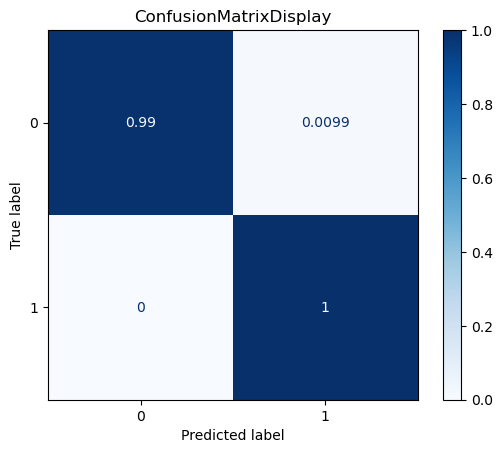

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, tf.round(y_pred_4),cmap='Blues', normalize='true')
plt.title("ConfusionMatrixDisplay");

## Working with larger example (multicalss classification)

When you have more than two classes as an option, its known as **multi-class calssification**
* This means if you have 3 diffrent class its multi-class calssification
* its also means if you have 100 difrent classes, its multi-class calssification.

To practise multi-class calssification, we are going to build a neural network to classify images of diffrent items of clothing.

In [36]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels)  = fashion_mnist.load_data()

In [37]:
print(f"Train data:\n{train_data[0]}\n")
print(f"Train label:\n{train_labels[0]}\n")

Train data:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   

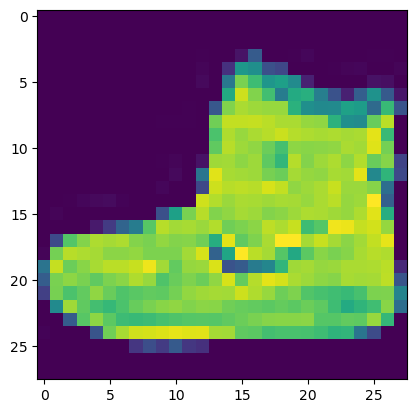

In [38]:
plt.imshow(train_data[0]);

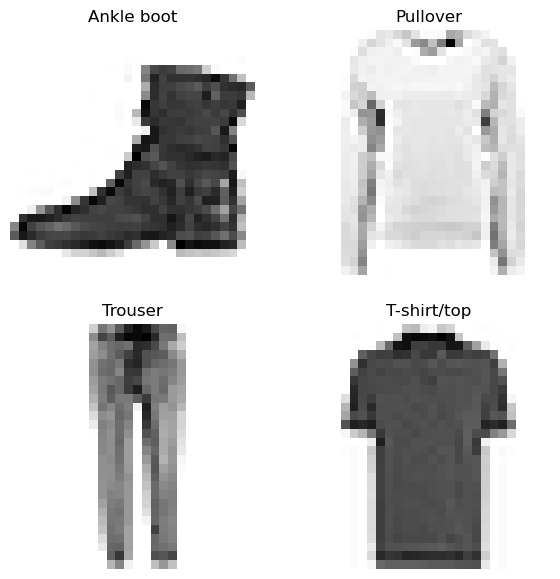

In [39]:
class_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

import random

plt.figure(figsize=(7,7))

for i in range(4):
    ax = plt.subplot(2,2,i+1)
    random_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[random_index], cmap=plt.cm.binary)
    plt.title(class_name[train_labels[random_index]])
    plt.axis(False);

## Building a multi-class calssification moedol
For our multi-class classification model, we can use a similar architecture to our binary classification, however we are going to have to tweak a few things:
* Input shape = 28 x 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrosstentropy()
* Output layer activation = Softmax (not sigmoid)

In [40]:
from tensorflow.keras.layers import Flatten

In [41]:
tf.random.set_seed(42)

model_7 = Sequential()

model_7.add(Flatten(input_shape=(28,28)))
model_7.add(Dense(4, activation='relu'))
model_7.add(Dense(4, activation='relu'))
model_7.add(Dense(10, activation='softmax'))

model_7.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])



# non norm history
history_4 = model_7.fit(train_data,
                        tf.one_hot(train_labels, depth=10), 
                        epochs=10,
                        validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 1s 548us/step - loss: 2.3129 - accuracy: 0.0971 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 1s 531us/step - loss: 2.3029 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 1s 497us/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 1s 525us/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 1s 511us/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 1s 507us/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 1s 586us/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 -

In [42]:
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 4)                 3140      
                                                                 
 dense_17 (Dense)            (None, 4)                 20        
                                                                 
 dense_18 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to scaled (or normalized), this means they like to have the numbers they try to find patterns in the tensor between 1 & 0.

In [44]:
# We can get our training and testing data between 0 & 1 by dividing the the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

# check the min and max values of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [45]:
tf.random.set_seed(42)

model_8 = Sequential()

model_8.add(Flatten(input_shape=(28,28)))
model_8.add(Dense(4, activation='relu'))
model_8.add(Dense(4, activation='relu'))
model_8.add(Dense(10, activation='softmax'))

model_8.compile(loss='sparse_categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])



# norm history
history_5 = model_8.fit(train_data_norm,
                        train_labels, 
                        epochs=10,
                        validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 577us/step - loss: 1.3647 - accuracy: 0.4486 - val_loss: 1.0360 - val_accuracy: 0.6230
Epoch 2/10
1875/1875 [==============================] - 1s 514us/step - loss: 0.9013 - accuracy: 0.6741 - val_loss: 0.8555 - val_accuracy: 0.7189
Epoch 3/10
1875/1875 [==============================] - 1s 532us/step - loss: 0.7726 - accuracy: 0.7361 - val_loss: 0.7822 - val_accuracy: 0.7371
Epoch 4/10
1875/1875 [==============================] - 1s 512us/step - loss: 0.7286 - accuracy: 0.7491 - val_loss: 0.7531 - val_accuracy: 0.7444
Epoch 5/10
1875/1875 [==============================] - 1s 513us/step - loss: 0.7026 - accuracy: 0.7544 - val_loss: 0.7342 - val_accuracy: 0.7533
Epoch 6/10
1875/1875 [==============================] - 1s 521us/step - loss: 0.6828 - accuracy: 0.7604 - val_loss: 0.7234 - val_accuracy: 0.7517
Epoch 7/10
1875/1875 [==============================] - 1s 517us/step - loss: 0.6654 - accuracy: 0.7671 - val_loss: 0.7321 -

**Note:** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1)

<AxesSubplot: title={'center': 'Non-normalized data'}>

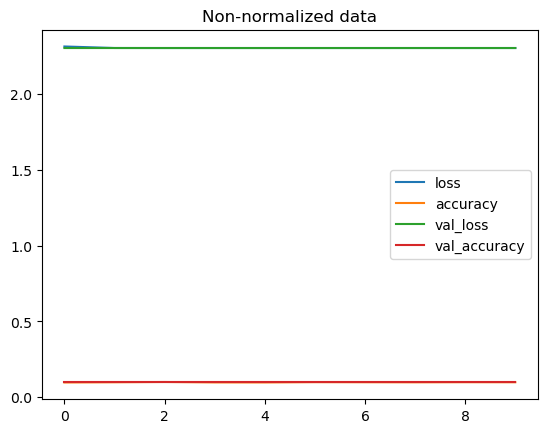

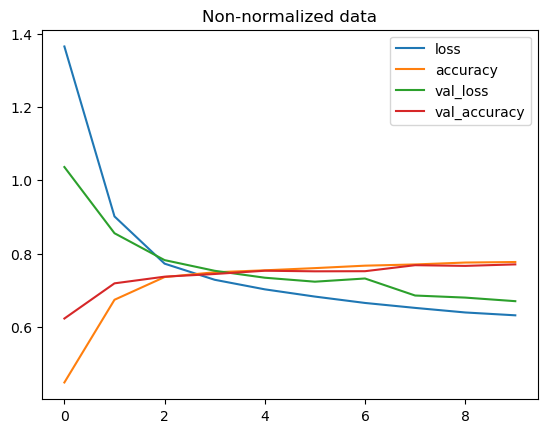

In [46]:
# plot non-normalized data loss cuves
pd.DataFrame(history_4.history).plot(title='Non-normalized data')
# plot normalized data loss curves
pd.DataFrame(history_5.history).plot(title='Non-normalized data')

> 🔑 **Note:** The same model with even *slightly* different data can produce *dramatically* diffrent results. So when you are comparing models, it's important to make sure you are comparing them on the same criteria (e.g same architecture but diffrent data or same data but diffrent architecture) 

In [49]:
# seed
tf.random.set_seed(42)

model_9 = Sequential()

model_9.add(Flatten(input_shape=(28,28)))
model_9.add(Dense(4,activation='relu'))
model_9.add(Dense(4,activation='relu'))
model_9.add(Dense(10,activation='softmax'))

model_9.compile(loss='sparse_categorical_crossentropy', 
                optimizer='adam',
                metrics=['accuracy'])

# callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_9.fit(train_data_norm,
                        train_labels, 
                        epochs=40,
                        validation_data=(test_data_norm, test_labels),
                              callbacks=[lr_scheduler])


Epoch 1/40
1875/1875 [==============================] - 2s 568us/step - loss: 1.5247 - accuracy: 0.4037 - val_loss: 1.2197 - val_accuracy: 0.4684 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 1s 511us/step - loss: 1.0885 - accuracy: 0.5316 - val_loss: 1.0362 - val_accuracy: 0.5621 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 1s 501us/step - loss: 0.8603 - accuracy: 0.6453 - val_loss: 0.8422 - val_accuracy: 0.6658 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 1s 502us/step - loss: 0.7650 - accuracy: 0.7133 - val_loss: 0.7767 - val_accuracy: 0.7288 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 1s 515us/step - loss: 0.7099 - accuracy: 0.7508 - val_loss: 0.7346 - val_accuracy: 0.7481 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 1s 516us/step - loss: 0.6806 - accuracy: 0.7636 - val_loss: 0.7219 - val_accuracy: 0.7508 - lr: 0.0018
Epoch 7/40
1875/1875 [========================

Text(0.5, 1.0, 'Find the ideal learning rate')

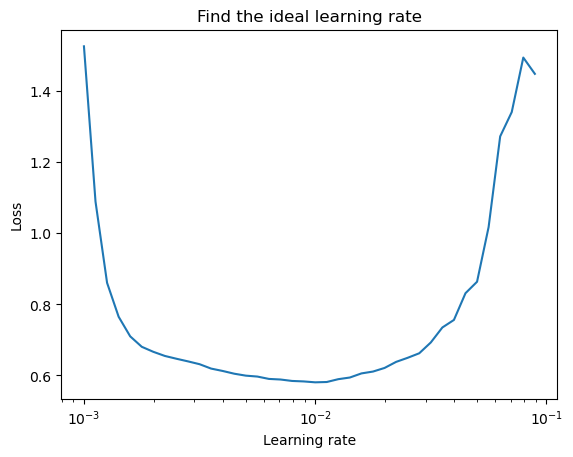

In [50]:
lrs1 = 1e-3*(10**(tf.range(40)/20))

plt.semilogx(lrs1, find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Find the ideal learning rate')

In [51]:
# seed
tf.random.set_seed(42)

model_10 = Sequential()

model_10.add(Flatten(input_shape=(28,28)))
model_10.add(Dense(4,activation='relu'))
model_10.add(Dense(4,activation='relu'))
model_10.add(Dense(10,activation='softmax'))

model_10.compile(loss='sparse_categorical_crossentropy', 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])




history_6 = model_10.fit(train_data_norm,
                        train_labels, 
                        epochs=20,
                        validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 2s 582us/step - loss: 0.9573 - accuracy: 0.6180 - val_loss: 0.8234 - val_accuracy: 0.6825
Epoch 2/20
1875/1875 [==============================] - 1s 558us/step - loss: 0.8029 - accuracy: 0.6919 - val_loss: 0.8007 - val_accuracy: 0.6985
Epoch 3/20
1875/1875 [==============================] - 1s 529us/step - loss: 0.7744 - accuracy: 0.7046 - val_loss: 0.8019 - val_accuracy: 0.7054
Epoch 4/20
1875/1875 [==============================] - 1s 507us/step - loss: 0.7583 - accuracy: 0.7089 - val_loss: 0.7540 - val_accuracy: 0.7137
Epoch 5/20
1875/1875 [==============================] - 1s 520us/step - loss: 0.7493 - accuracy: 0.7148 - val_loss: 0.7862 - val_accuracy: 0.7079
Epoch 6/20
1875/1875 [==============================] - 1s 520us/step - loss: 0.7378 - accuracy: 0.7216 - val_loss: 0.7744 - val_accuracy: 0.7205
Epoch 7/20
1875/1875 [==============================] - 1s 508us/step - loss: 0.7305 - accuracy: 0.7272 - val_loss: 0.7485 -